<a href="https://colab.research.google.com/github/lobasfs/-ML-/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BF%D0%BE_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%BC%D1%83_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl
!pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [45]:
# Считываем файл
df = pd.read_excel('Данные_для_курсовои_Классическое_МО.xlsx')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [47]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 214 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    Unnamed: 0                int64  
 1    IC50, mM                  float64
 2    CC50, mM                  float64
 3    SI                        float64
 4    MaxAbsEStateIndex         float64
 5    MaxEStateIndex            float64
 6    MinAbsEStateIndex         float64
 7    MinEStateIndex            float64
 8    qed                       float64
 9    SPS                       float64
 10   MolWt                     float64
 11   HeavyAtomMolWt            float64
 12   ExactMolWt                float64
 13   NumValenceElectrons       int64  
 14   NumRadicalElectrons       int64  
 15   MaxPartialCharge          float64
 16   MinPartialCharge          float64
 17   MaxAbsPartialCharge       float64
 18   MinAbsPartialCharge       float64
 19   FpDensityMorgan1          float64
 20   FpDens

In [48]:
df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Заведем новый DataFrame, чтобы не загружать каждый раз в Colab
df_copy = df.copy()
# и удалим ненужный столбец с порядковым номером строк
df_copy = df_copy.drop('Unnamed: 0', axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB


In [50]:
df_copy.describe(include = "all")


,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,348.262234,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,126.946370,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,110.156000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,264.321000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,315.457000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,409.283000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,904.777000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


In [51]:
# Выведим на экран пропуски и отсортируем их
pd.options.display.min_rows = 212
df_copy.isnull().sum().sort_values(ascending=False)

,0
MinAbsPartialCharge,3
MaxPartialCharge,3
MinPartialCharge,3
MaxAbsPartialCharge,3
BCUT2D_MWHI,3
BCUT2D_MRLOW,3
BCUT2D_MRHI,3
BCUT2D_LOGPLOW,3
BCUT2D_LOGPHI,3
BCUT2D_CHGLO,3


In [52]:
df_copy_nonan = df_copy.copy()
# Cобираем в список колонки с пропусками
cols_with_nan = df_copy_nonan.columns[df_copy_nonan.isna().any()].tolist()
print(len(cols_with_nan))
# Для каждой колонки с пропусками
for col in cols_with_nan:
    df_copy_nonan[col] = df_copy_nonan[col].transform(
        # и заполняем пропуски средним для него значением
        lambda x: x.fillna(x.mean())
    )

# проверим результат
pd.options.display.min_rows = 212
df_copy_nonan.isnull().sum().sort_values(ascending=False)

12


,0
"IC50, mM",0
"CC50, mM",0
SI,0
MaxAbsEStateIndex,0
MaxEStateIndex,0
MinAbsEStateIndex,0
MinEStateIndex,0
qed,0
SPS,0
MolWt,0


In [53]:
df_copy_nonan.any()

,0
"IC50, mM",True
"CC50, mM",True
SI,True
MaxAbsEStateIndex,True
MaxEStateIndex,True
MinAbsEStateIndex,True
MinEStateIndex,True
qed,True
SPS,True
MolWt,True


In [54]:
# Датафрейм с нулевыми значениями
df_null = df_copy_nonan.loc[:, ~df_copy_nonan.any()]
df_null

,NumRadicalElectrons,SMR_VSA8,SlogP_VSA9,fr_N_O,fr_SH,fr_azide,fr_barbitur,fr_benzodiazepine,fr_diazo,fr_dihydropyridine,fr_isocyan,fr_isothiocyan,fr_lactam,fr_nitroso,fr_phos_acid,fr_phos_ester,fr_prisulfonamd,fr_thiocyan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['NumRadicalElectrons']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'NumRadicalElectrons'}, axis=1)
              .sort_values('NumRadicalElectrons', ascending=True))
  xs = counted['NumRadicalElectrons']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_null.sort_values('NumRadicalElectrons', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NumRadicalElectrons')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['SMR_VSA8']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'SMR_VSA8'}, axis=1)
              .sort_values('SMR_VSA8', ascending=True))
  xs = counted['SMR_VSA8']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_null.sort_values('SMR_VSA8', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SMR_VSA8')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['SlogP_VSA9']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'SlogP_VSA9'}, axis=1)
              .sort_values('SlogP_VSA9', ascending=True))
  xs = counted['SlogP_VSA9']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_null.sort_values('SlogP_VSA9', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SlogP_VSA9')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['fr_N_O']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'fr_N_O'}, axis=1)
              .sort_values('fr_N_O', ascending=True))
  xs = counted['fr_N_O']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_null.sort_values('fr_N_O', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fr_N_O')
_ = plt.ylabel('count()')

In [55]:
# Удаление с нулевыми значениями
df_dropped = df_copy_nonan.drop(df_null, axis=1)
df_dropped

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,2,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0
5,15.037911,30.075821,2.000000,5.758408,5.758408,0.278083,0.278083,0.711012,28.600000,332.491,...,0,0,0,0,0,0,0,0,0,0
6,18.908167,14.559288,0.770000,2.584472,2.584472,0.429649,0.429649,0.328539,36.564103,528.869,...,2,0,0,0,0,0,0,0,0,0
7,28.773087,23.593931,0.820000,13.821880,13.821880,0.079845,-0.301260,0.217332,31.333333,695.089,...,0,0,0,0,0,0,0,0,4,0
8,50.057068,153.709268,3.070681,14.171614,14.171614,0.019123,-0.411828,0.187781,29.157895,763.123,...,0,0,0,0,0,0,0,0,0,0
9,6.400847,400.906360,62.633333,6.135893,6.135893,0.239226,0.239226,0.439915,36.400000,468.685,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Удаление дубликатов
df_drop_dublicate = df_dropped.drop_duplicates()
df_drop_dublicate.describe()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,...,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,220.726223,586.419908,73.967907,10.893712,10.893712,0.179533,-0.960140,0.577633,29.370350,351.486139,...,0.054696,0.055728,0.012384,0.009288,0.001032,0.001032,0.053664,0.070175,0.208462,0.007224
std,397.172441,633.624464,695.564665,3.284005,3.284005,0.168928,1.567568,0.213316,12.605779,127.388186,...,0.305090,0.263069,0.110649,0.095975,0.032125,0.032125,0.225469,0.255574,1.231428,0.084730
min,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,110.156000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.515396,99.999345,1.488095,10.006389,10.006389,0.050979,-1.333174,0.442842,18.500000,266.252000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.338355,424.166213,3.900000,12.196496,12.196496,0.123850,-0.419485,0.634372,29.200000,318.373000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,231.373089,891.776925,16.375000,13.178870,13.178870,0.291020,0.007873,0.742483,38.600000,413.670000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,904.777000,...,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000


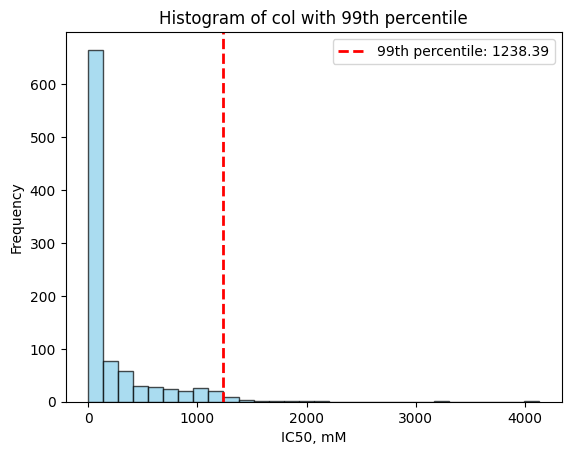

In [100]:
df_q992 = df_drop_dublicate['IC50, mM'].quantile(0.98)

plt.hist(df_drop_dublicate['IC50, mM'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(df_q992, color='red', linestyle='dashed', linewidth=2, label=f'99th percentile: {df_q992:.2f}')
plt.title('Histogram of col with 99th percentile')
plt.xlabel('IC50, mM')
plt.ylabel('Frequency')
plt.legend()
plt.show()

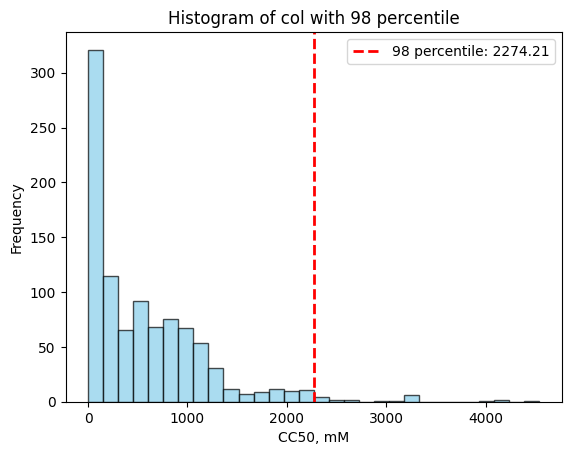

In [103]:
df_q98 = df_drop_dublicate['CC50, mM'].quantile(0.98)

plt.hist(df_drop_dublicate['CC50, mM'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(df_q98, color='red', linestyle='dashed', linewidth=2, label=f'98 percentile: {df_q98:.2f}')
plt.title('Histogram of col with 98 percentile')
plt.xlabel('CC50, mM')
plt.ylabel('Frequency')
plt.legend()
plt.show()

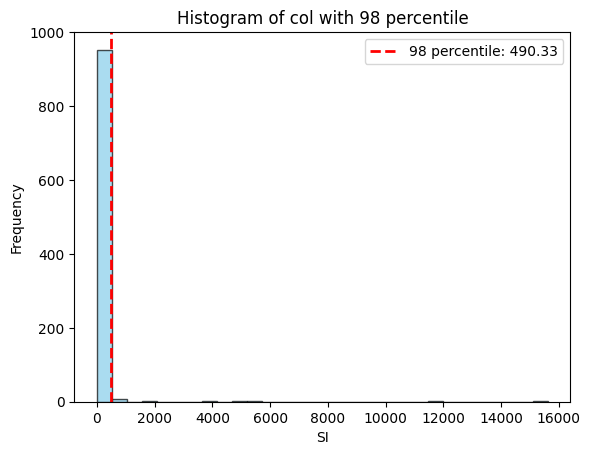

In [105]:
df_q98 = df_drop_dublicate['SI'].quantile(0.98)

plt.hist(df_drop_dublicate['SI'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(df_q98, color='red', linestyle='dashed', linewidth=2, label=f'98 percentile: {df_q98:.2f}')
plt.title('Histogram of col with 98 percentile')
plt.xlabel('SI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [108]:
# Удаляем строки, где значение "IC50, mM", "CC50, mM" и "SI" выше 98 перцентиля
for col in ['IC50, mM', 'CC50, mM', 'SI']:
    if col in df_drop_dublicate.columns:
        q98 = df_drop_dublicate[col].quantile(0.98)
        df_q98 = df_drop_dublicate[df_drop_dublicate[col] <= q98]

df_q98.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 1000
Columns: 195 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(88)
memory usage: 1.4 MB


In [109]:
# Сохранение в файл
df_q98.to_csv('Обработанный.csv', index=False)

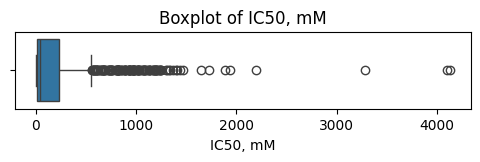

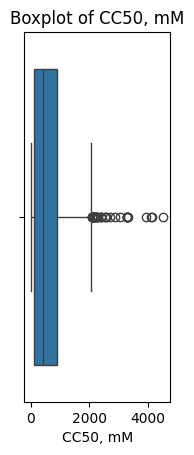

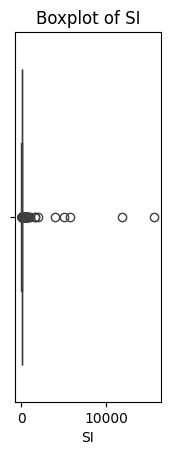

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 1))
# Выбросы IC50, mM
plt.subplot(1, 3, 1)
sns.boxplot(x=df_drop_dublicate['IC50, mM'])
plt.title('Boxplot of IC50, mM')
plt.xlabel('IC50, mM')
plt.show()

# выбросы CC50, mM
plt.subplot(1, 3, 2)
sns.boxplot(x=df_drop_dublicate['CC50, mM'])
plt.title(f'Boxplot of CC50, mM')
plt.xlabel('CC50, mM')
plt.show()

# выбросы SI
plt.subplot(1, 3, 3)
sns.boxplot(x=df_drop_dublicate['SI'])
plt.title(f'Boxplot of SI')
plt.xlabel('SI')
plt.show()

In [ ]:
cleaned_df = df_drop_dublicate[df_drop_dublicate['IC50, mM'] <= 400]
cleaned_df[['IC50, mM']].describe()

,"IC50, mM"
count,798.000000
mean,70.478622
std,91.601372
min,0.003517
25%,9.310200
50%,30.899916
75%,97.043150
max,399.647104


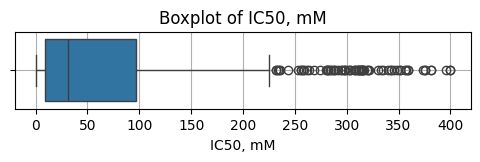

In [ ]:
plt.figure(figsize=(20, 1))
# Выбросы IC50, mM
plt.subplot(1, 3, 1)
sns.boxplot(x=cleaned_df['IC50, mM'])
plt.title(f'Boxplot of IC50, mM')
plt.xlabel('IC50, mM')
plt.grid(True)

<Axes: >

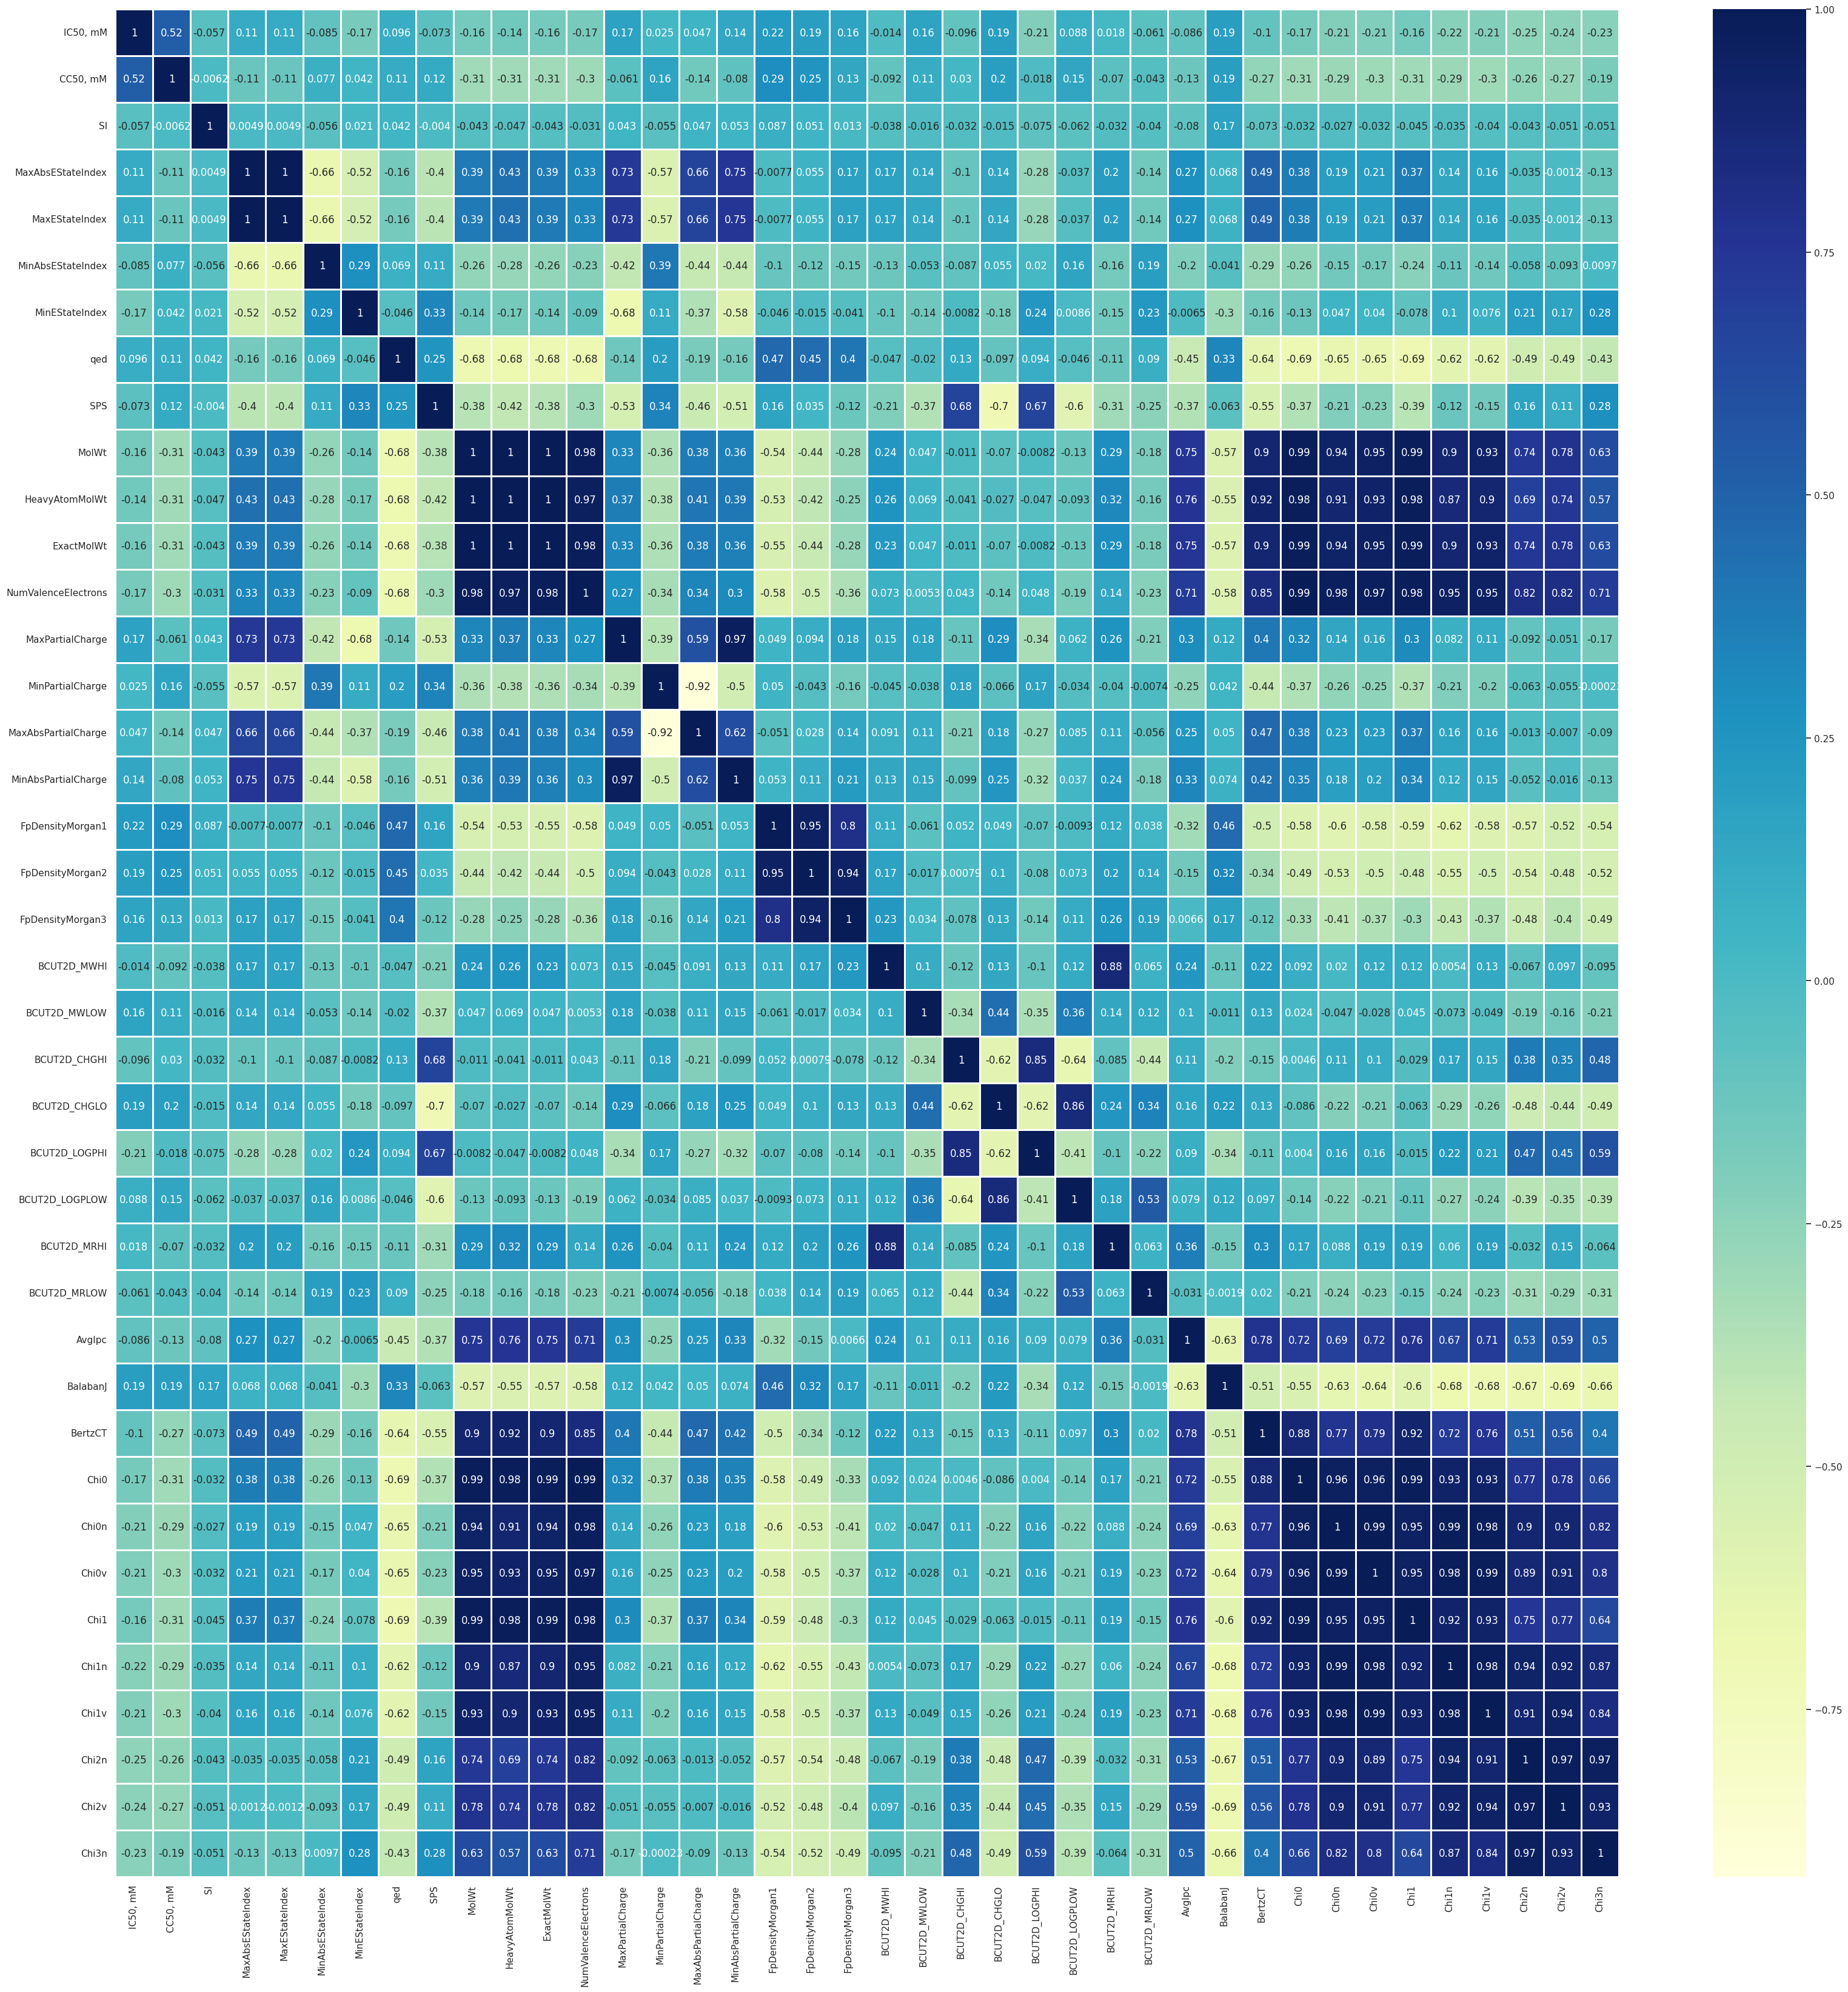

In [ ]:
# Смотрим на корреляцию
import seaborn as sns
sns.set(rc = {'figure.figsize':(40, 40)})
df_drop_dublicate1=df_drop_dublicate.iloc[:, 0:40]
df_drop_dublicate2=df_drop_dublicate.iloc[:, 21:40]
df_drop_dublicate3=df_drop_dublicate.iloc[:, 41:60]
sns.heatmap(df_drop_dublicate1.corr(numeric_only=True), annot=True, cmap="YlGnBu", linecolor='white', linewidths=1)


<Axes: >

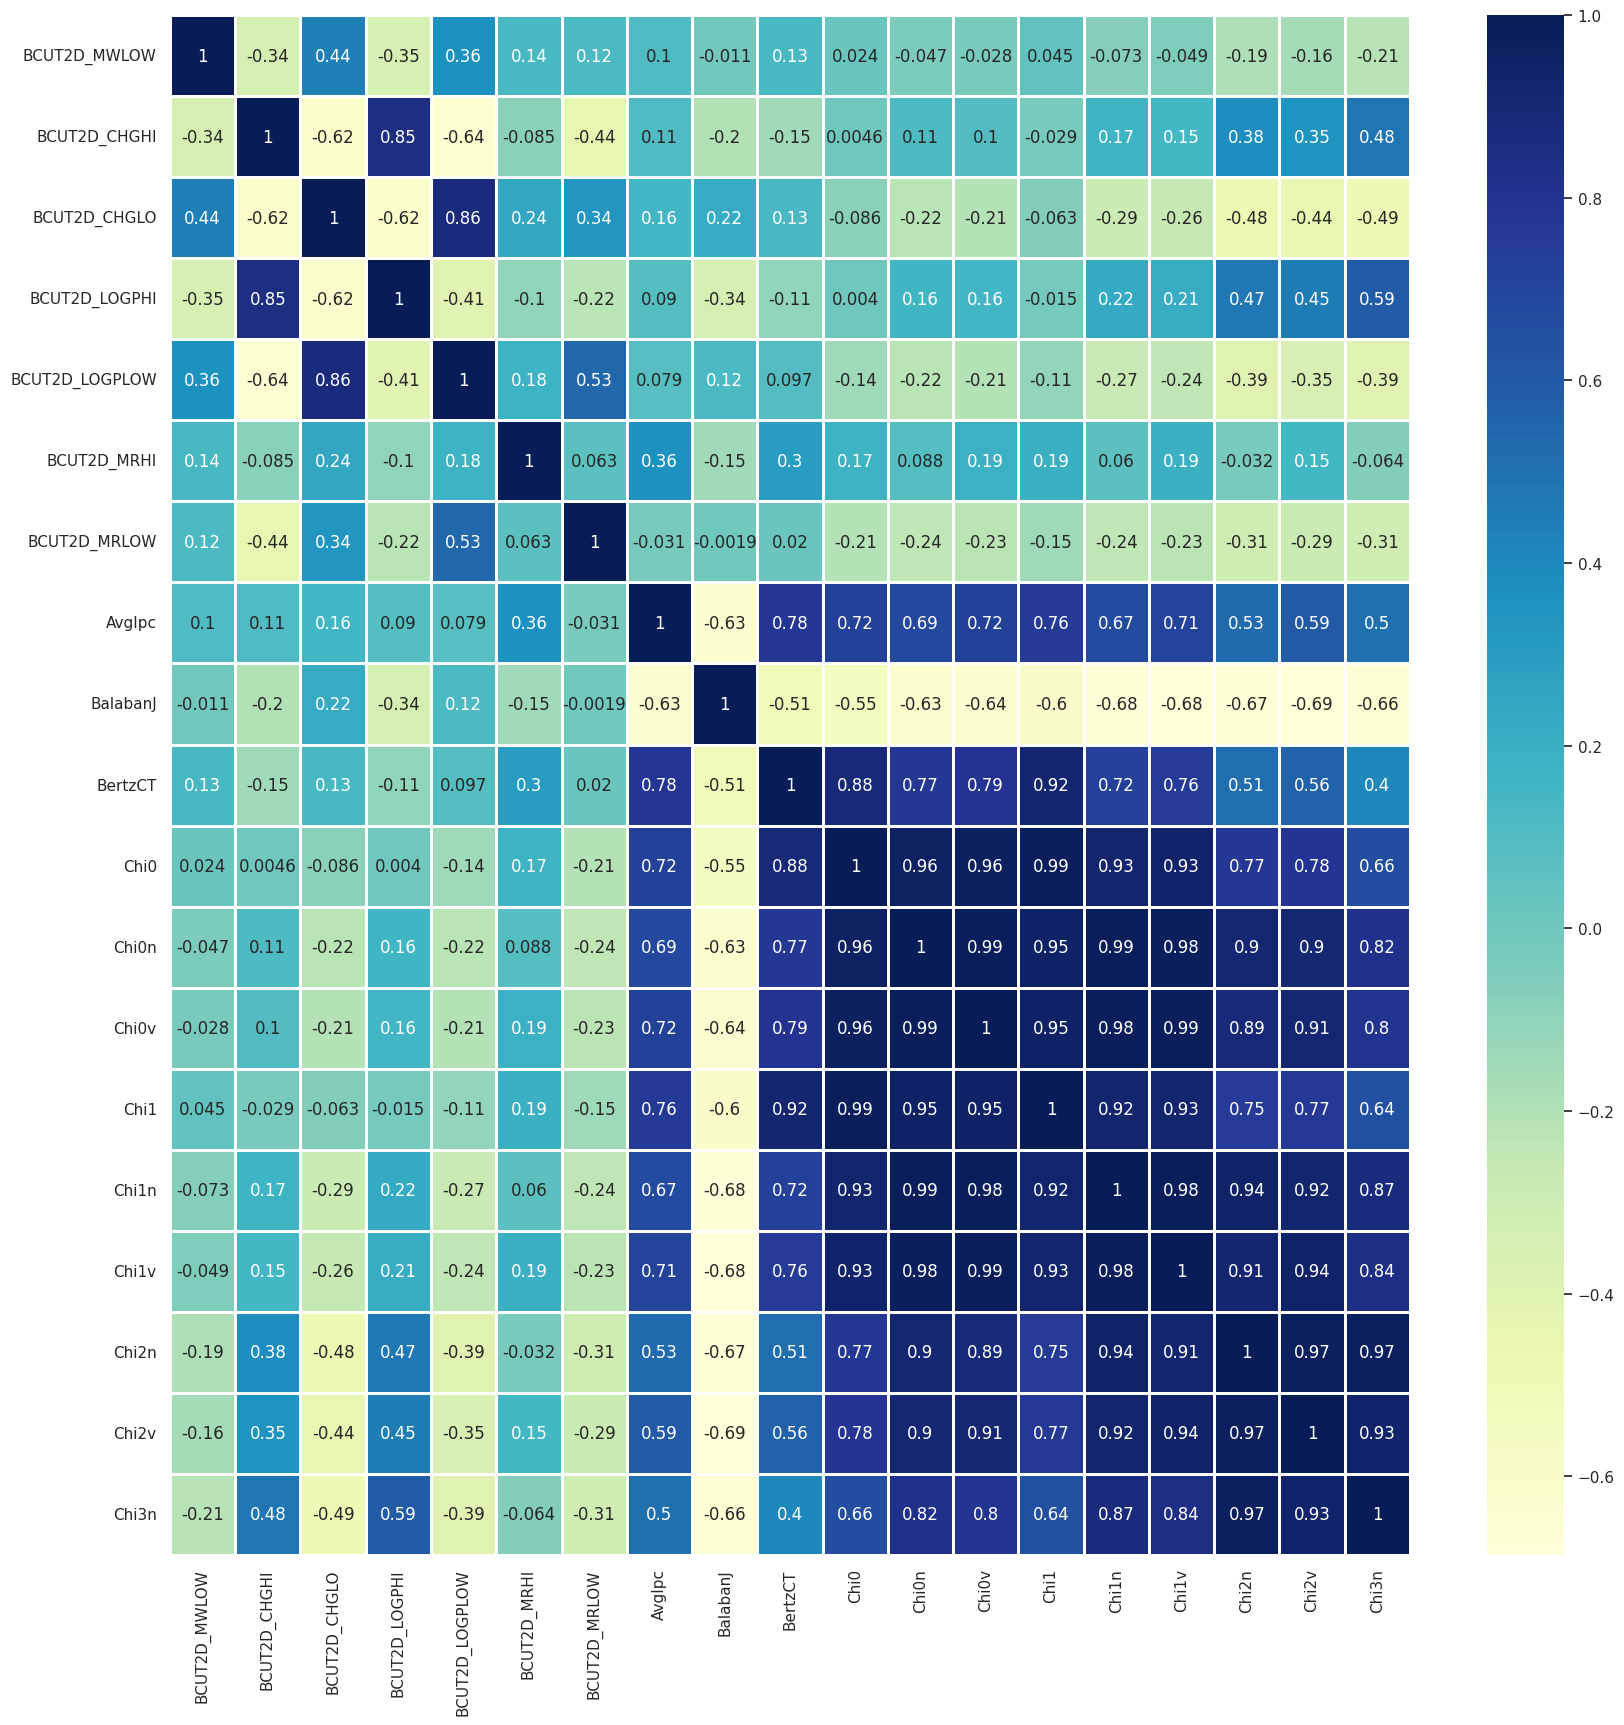

In [ ]:
sns.heatmap(df_drop_dublicate2.corr(numeric_only=True), annot=True, cmap="YlGnBu", linecolor='white', linewidths=1)

<Axes: >

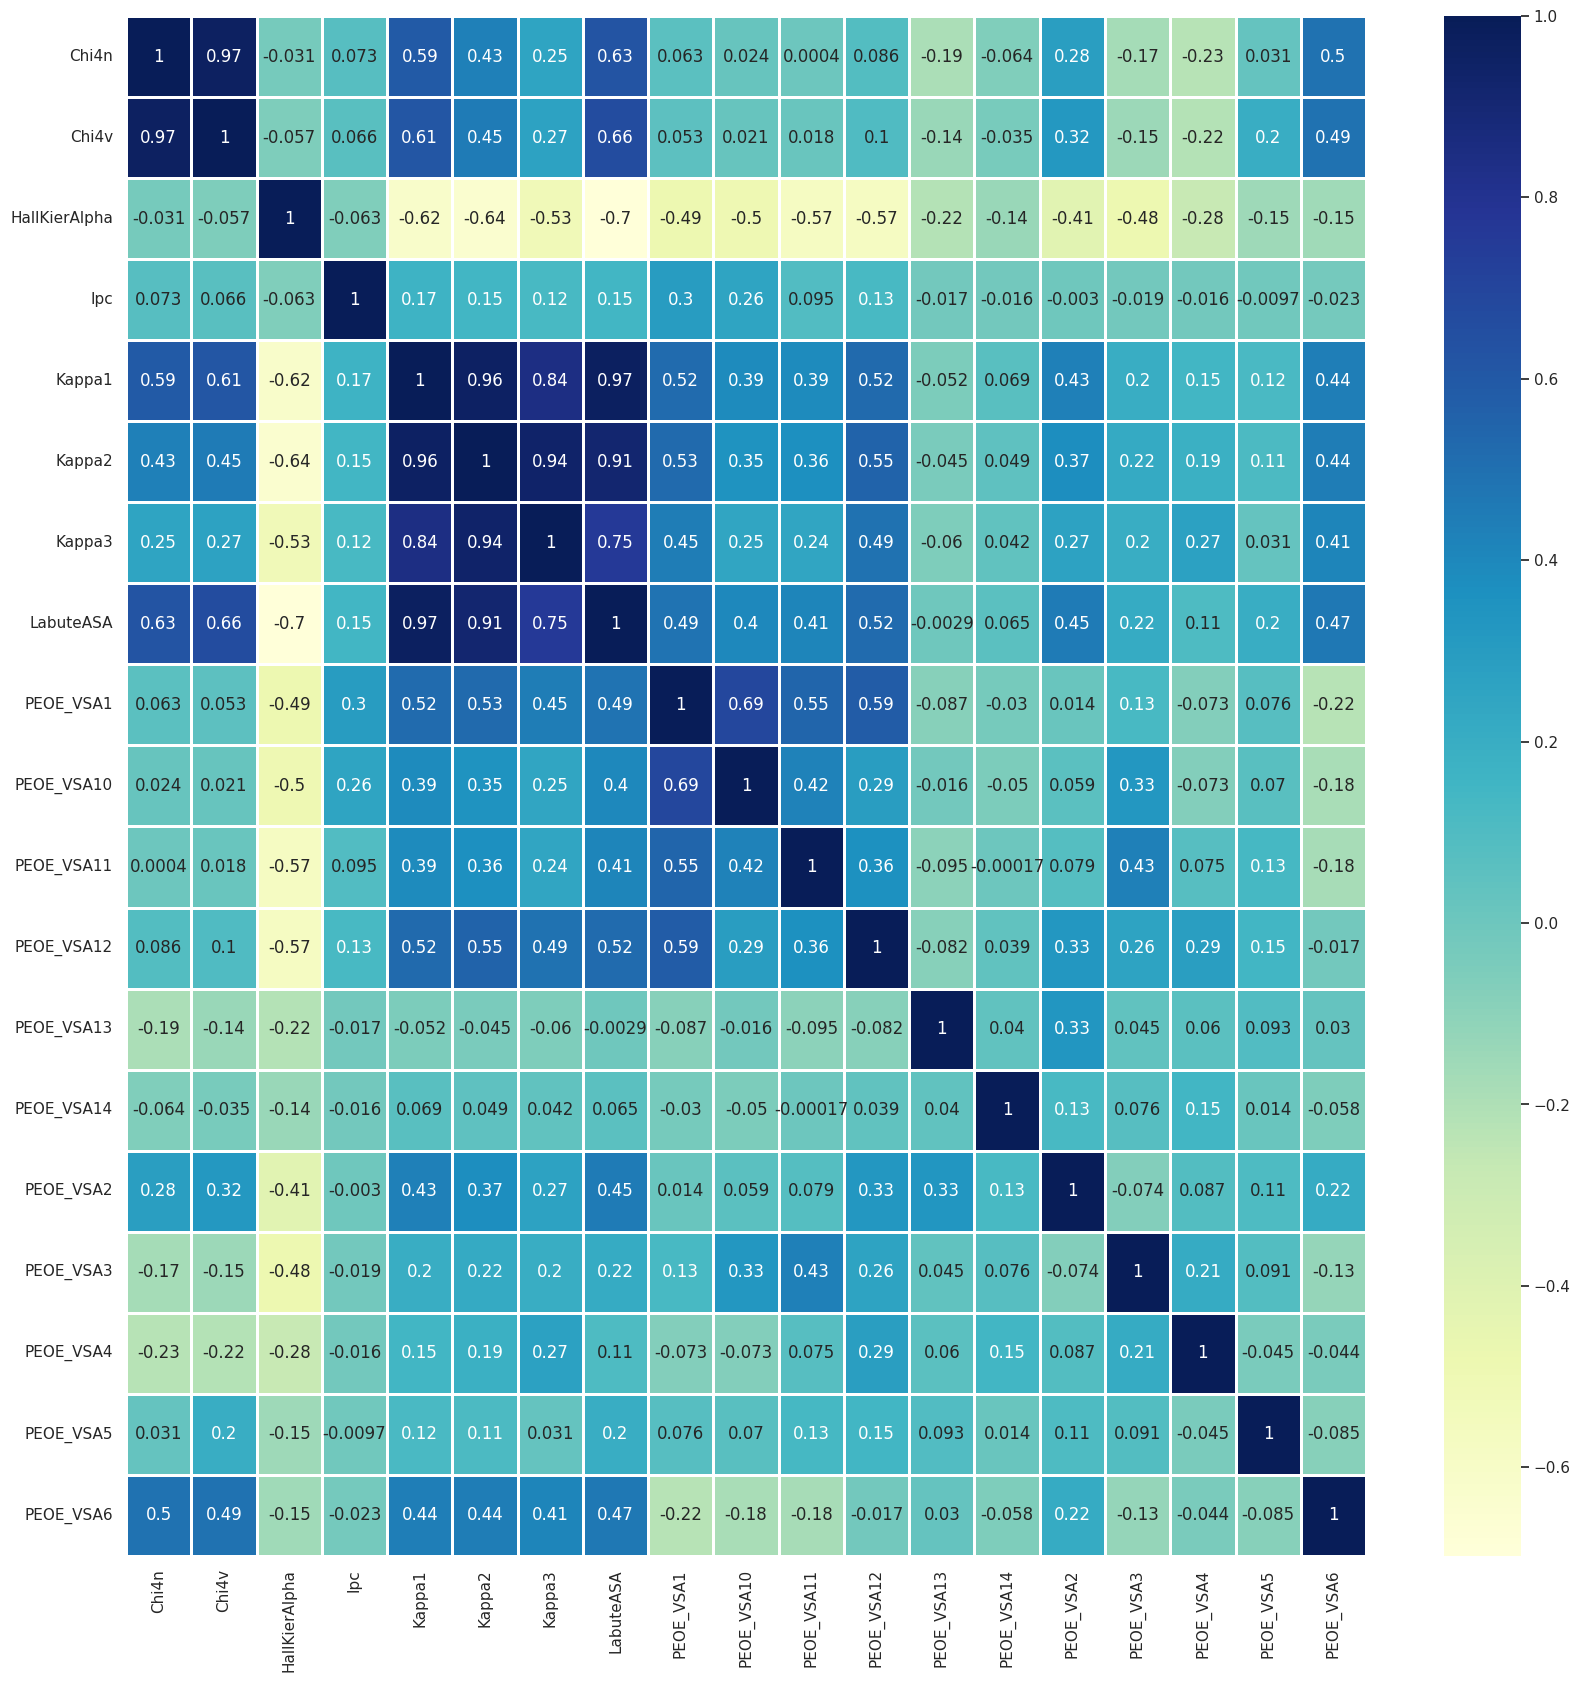

In [ ]:
sns.heatmap(df_drop_dublicate3.corr(numeric_only=True), annot=True, cmap="YlGnBu", linecolor='white', linewidths=1)

In [ ]:
# Функция для подсчёта выбросов в колонке
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

# Считаем выбросы для каждой колонки
outliers_count = df_drop_dublicate.apply(count_outliers)

# Выбираем топ-10 колонок с наибольшим числом выбросов
top_10_outlier_columns = outliers_count.nlargest(10).index.tolist()

# Фильтруем DataFrame и применяем describe()
result = df_drop_dublicate[top_10_outlier_columns].describe()

result

,VSA_EState9,fr_amide,fr_Al_OH,fr_aniline,fr_allylic_oxid,Ipc,fr_ester,PEOE_VSA4,PEOE_VSA13,fr_Al_OH_noTert
count,969.000000,969.000000,969.000000,969.000000,969.000000,9.690000e+02,969.000000,969.000000,969.000000,969.000000
mean,0.557416,0.347781,0.409701,0.307534,0.342621,4.991263e+10,0.227038,2.901901,1.208633,0.313725
std,1.675162,0.708419,1.051538,0.666770,0.805617,1.276529e+12,0.483244,6.611756,2.651256,1.006501
min,-7.681287,0.000000,0.000000,0.000000,0.000000,1.071072e+02,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.047821e+04,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.204932e+05,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,5.643087e+06,0.000000,0.000000,0.000000,0.000000
max,10.183618,4.000000,12.000000,4.000000,8.000000,3.951781e+13,4.000000,44.612417,17.721539,12.000000


In [ ]:
#!pip install statsmodels
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Подготовка данных для модели
df_copy_nonan1=df_copy_nonan.drop('CC50, mM', axis=1)
df_copy_nonan2=df_copy_nonan1.drop('SI', axis=1)
X = df_copy_nonan2.drop('IC50, mM', axis=1)  # Все столбцы, кроме IC50, mM, используются как независимые переменные
y = df_copy_nonan['IC50, mM']  # Зависимая переменная

# Добавление константы для регрессионной модели
X = sm.add_constant(X)

# Построение модели линейной регрессии
model = sm.OLS(y, X).fit()

# Вывод результатов
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               IC50, mM   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     8.145
Date:                Fri, 23 May 2025   Prob (F-statistic):           5.91e-85
Time:                        10:42:14   Log-Likelihood:                -7031.6
No. Observations:                1001   AIC:                         1.432e+04
Df Residuals:                     873   BIC:                         1.495e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
# Предположим, что целевая колонка называется 'target', признаки — все остальные
df_copy_nonan_dropCC50= df_copy_nonan.drop('CC50, mM', axis=1)
df_copy_nonan_dropCC50= df_copy_nonan_dropCC50.drop('SI', axis=1)
X = df_copy_nonan_dropCC50.drop('IC50, mM', axis=1)  # признаки

y = df['IC50, mM']               # целевая переменная

# Инициализация модели и обучение
model = LinearRegression()
model.fit(X, y)

# Предсказания на тех же данных (для примера)
predictions = model.predict(X)

print(predictions)

[ -25.34378053   -5.12607662  -10.09048697 ... -481.32767661  -40.14361486
   20.61026872]


In [ ]:
#Удаляем признаки в пределах 0,9
df.drop(['handAcc6', 'chestAcc6', 'ankleAcc6'], axis=1, inplace=True)

In [ ]:
# Выбираем 20% случайных объектов
df = df.groupby('subject_id').apply(lambda x: x.sample(frac=0.2, random_state=42)).reset_index(drop=True)
# проверим распределение между субъектами
df['subject_id'].value_counts()

<ipython-input-153-a17332624adb>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('subject_id').apply(lambda x: x.sample(frac=0.2, random_state=42)).reset_index(drop=True)


,count
subject_id,
5,15359
8,14609
6,14048
1,13976
2,13748
4,12748
7,12423
3,10009


In [ ]:
# Также удалим еще ненужные стольбцы
df.drop(['subject_id'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         534601 non-null  float64
 1   handAcc16         534601 non-null  float64
 2   handGyro          534601 non-null  float64
 3   handMagne         534601 non-null  float64
 4   handOrientation   534601 non-null  float64
 5   chestAcc16        534601 non-null  float64
 6   chestGyro         534601 non-null  float64
 7   chestMagne        534601 non-null  float64
 8   chestOrientation  534601 non-null  float64
 9   ankleAcc16        534601 non-null  float64
 10  ankleGyro         534601 non-null  float64
 11  ankleMagne        534601 non-null  float64
 12  ankleOrientation  534601 non-null  float64
dtypes: float64(13)
memory usage: 53.0 MB


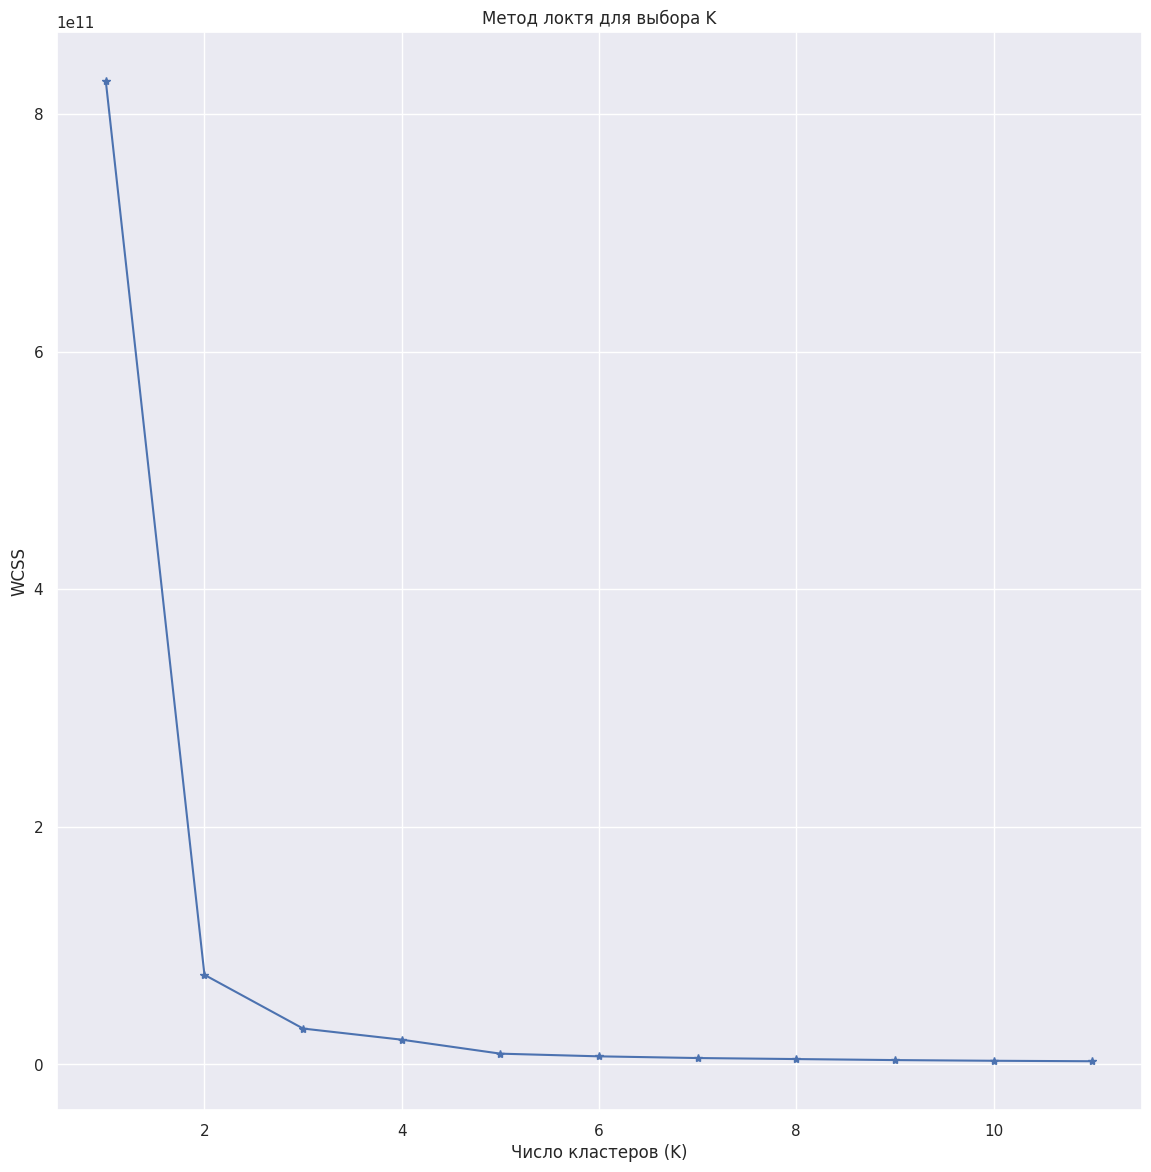

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Создадим вектор признаков
X = df
# Считаем WCSS для разных K
wcss = []
K_values = range(1, 12)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ -- сумма квадратов расстояний точек до центроидов

# Строим график
plt.plot(K_values, wcss, marker='*', linestyle='-')
plt.xlabel("Число кластеров (K)")
plt.ylabel("WCSS")
plt.title("Метод локтя для выбора K")
plt.show()

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
# инициализируем модель
model = KMeans(n_clusters=7)

# делаем кластеризацию
clusters = model.fit_predict(X)

# инициализируем конечный датафрейм
df_result = df
# добавляем колонку с кластерами
df_result['cluster'] = clusters
# добавляем колонку, в которую будем сохранять идентификатор активности
df_result['activityID'] = -1

# справочник соответствия номера кластера и идентификатора активности
dict = {}
# переменная для хранения идентификатора для следующей неизвестной активности
activityID = 1

for index, row in df_result.iterrows():
    if row['cluster'] in dict.keys():
        df_result.loc[index, 'activityID'] = dict[row['cluster']]
    else:
        dict[row['cluster']] = activityID
        df_result.loc[index, 'activityID'] = activityID
        activityID += 1

In [ ]:
# Создание файла submission.csv
submission = df_result[['activityID']].reset_index()
submission.columns = ['Index', 'activityID']
submission.to_csv('submission.csv', index=False)
submission.head(10)

,Index,activityID
0,0,1
1,1,2
2,2,3
3,3,4
4,4,3
5,5,5
6,6,1
7,7,4
8,8,6
9,9,4


In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in [4,5,6]:
    # инициализируем алгоритм с соответствующим количеством кластеров
    kmeans = KMeans(n_clusters=i, random_state=42)

    # обучаем модель и получаем кластеры
    kmeans.fit(X)
    clusters_kmean = kmeans.predict(X)

    # считаем оценку
    score = silhouette_score(X, clusters_kmean)
    # и выводим ее в консоль
    print(f'Score KMeans for K={i}: {score}')

Score KMeans for K=4: 0.6518006891793048
Score KMeans for K=5: 0.6543840048096029
Score KMeans for K=6: 0.6221262270708691


In [ ]:
for i in [3,7,8]:
    # инициализируем алгоритм с соответствующим количеством кластеров
    kmeans = KMeans(n_clusters=i, random_state=42)

    # обучаем модель и получаем кластеры
    kmeans.fit(X)
    clusters_kmean = kmeans.predict(X)

    # считаем оценку
    score = silhouette_score(X, clusters_kmean)
    # и выводим ее в консоль
    print(f'Score KMeans for K={i}: {score}')

Score KMeans for K=3: 0.7775095534619798
Score KMeans for K=7: 0.6020971225877736
Score KMeans for K=8: 0.5571866550499085
